<a href="https://colab.research.google.com/github/JPFphysics/15c-lab/blob/master/thin_lens_equation_experiment_for_15c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Thin lens equation experiment for 15c

from fiting: slope = -0.9750621891560465  +/-  0.008013778308638227
from fiting: focal_length = 6.548216825820551  +/-  0.032394235090786004 cm
number of measured data points:  14
chi_squared of the best fit =   4.150881252758936
reduced_chi_squared of the best fit =   0.34590677106324463


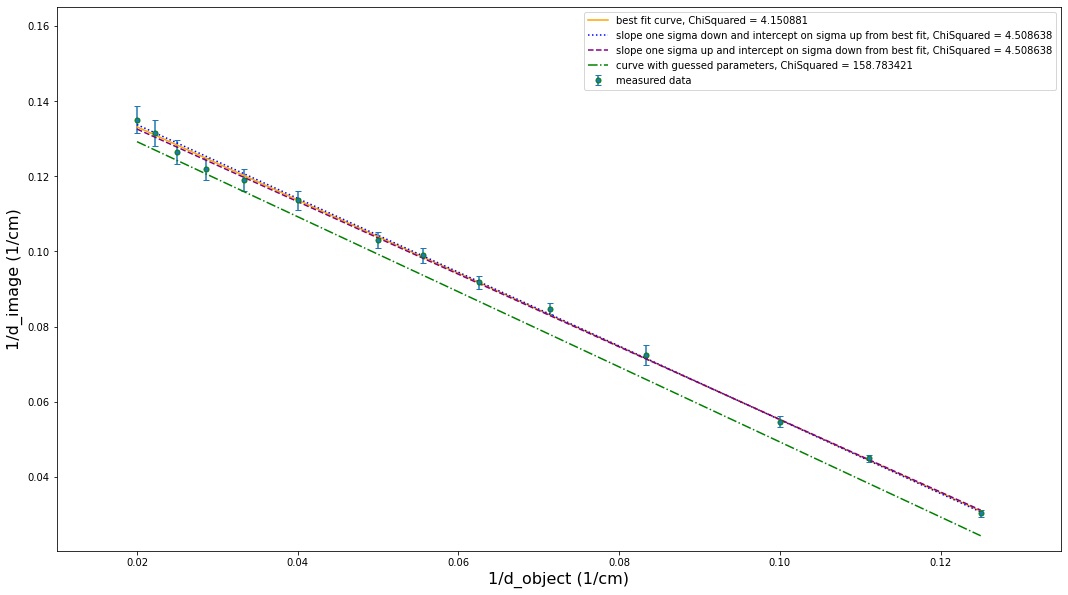

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


##################################################################
#                                                                #
# You need to measure the following values of your own setup     #
# and put in the code:                                           #
#                                                                #
# d_object, d_image, err_d_image,                                #      
#                                                                #
# See the description of these values below.                     #
#                                                                #
# You can also guess the slope and y-intercept of the fitted     #
# curve by typing your guessed number for                        #
#                                                                #
# slope_guess, intercept_guess                                   #
#                                                                #
#                                                                #
#                                                                #
##################################################################



######################################
# Input your own d_object here:      #
#                                    #
######################################
d_object = np.array([50,45,40,35,30,25,20,18,16,14,12,10,9,8])     # distance between object and lens, in cm


#######################################
# Input your own d_image.    here:    #
#                                     #
#######################################
d_image = np.array([7.4, 7.6, 7.9, 8.2, 8.4, 8.8, 9.7, 10.1, 10.9, 11.8, 13.8, 18.3, 22.3, 33.0])  # distance between image and lens, in cm


###################################################
# Input your own err_d_image here:                #
#                                                 #
###################################################
err_d_image = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 1.0])  # measurement error of d_image, in cm


#######################################################
# Input your guessed slope and y-intercept here:      #
# (Hint: y-intercept is related to inverse of the     #
# focal length of the thin lens)                      #
#######################################################

slope_guess = -1
intercept_guess = 1/6.7  # unit of 1/cm




##########################################
#                                        #
# Don't need to change the lines below   #
#                                        #
##########################################              

# calculate 1/d_object:
x = 1/d_object

# calculate 1/d_image:
y = 1/d_image 

# calcluate the error of y, using error propagation:
err_y = err_d_image/d_image**2


# Do Chi-squared analysis:

# define functions to calculate the reduced Chi square
def ChiSquareReduced(y,yfit,error,v):
    '''this function calculate reduced Chi Square of v parameter fit'''
    ChiSquareReducedValue = np.sum((y-yfit)**2/error**2)/(len(y)-v)
    return ChiSquareReducedValue
# define functions to calculate the Chi square
def ChiSquare(y,yfit,error):
    '''this function calculate Chi Square'''
    ChiSquareValue = np.sum((y-yfit)**2/error**2)
    return ChiSquareValue

# define a two parameter line 
def func(x, a, b):
    return a * x + b

# Find the best fit using scipy.optimize (curve_fit)
popt, pcov = curve_fit(func, x, y, sigma=err_y ) # popt: Optimal values for the parameters, pcov: the estimated covariance of popt

# Print the best fit parameters
print ('from fiting: slope =', popt[0], ' +/- ', np.sqrt(pcov[0,0]))
print ('from fiting: focal_length =', 1/popt[1], ' +/- ', np.sqrt(pcov[1,1])/popt[1]**2, 'cm')

y_fit = popt[0]*x + popt[1]  # y calculated from curve fit

chi_squared_bestfit = ChiSquare(y, y_fit, err_y)  #chi squared value of the curve fit
reduced_chi_squared_bestfit = ChiSquareReduced(y, y_fit, err_y, 2)

print('number of measured data points: ', np.size(x))
print('chi_squared of the best fit =  ', chi_squared_bestfit)
print('reduced_chi_squared of the best fit =  ', reduced_chi_squared_bestfit)


y_fit_one_sigma_away1 = (popt[0]-np.sqrt(pcov[0,0]))*x + (popt[1]+np.sqrt(pcov[1,1])) # y calculated, using slope one sigma down and intercept one sigma up from best fit parameters
chi_squared_one_sigma_away1 = ChiSquare(y, y_fit_one_sigma_away1, err_y)  #chi squared value of the curve slope one sigma down and intercept one sigma up from best fit parameters

y_fit_one_sigma_away2 = (popt[0]+np.sqrt(pcov[0,0]))*x+ (popt[1]-np.sqrt(pcov[1,1])) # y calculated, using slope one sigma up and intercept one sigma down from best fit parameters
chi_squared_one_sigma_away2 = ChiSquare(y, y_fit_one_sigma_away2, err_y)  #chi squared value of the curve slope one sigma up and intercept one sigma down from best fit parameters


y_guess = slope_guess*x + intercept_guess # y calculated, using guessed parameters
chi_squared_guess= ChiSquare(y, y_guess, err_y)  #chi squared value of the guessed curve



# plot the measured data and curve fit together
plt.figure(figsize=[18,10])
plt.errorbar(x, y, err_y, fmt='o',ms=5, mec='g',capsize=3, label = 'measured data')
plt.plot(x, y_fit, 'orange' , label='best fit curve, ChiSquared = {:f}'.format(chi_squared_bestfit))
plt.plot(x, y_fit_one_sigma_away1, 'b:' , label='slope one sigma down and intercept on sigma up from best fit, ChiSquared = {:f}'.format(chi_squared_one_sigma_away1))
plt.plot(x, y_fit_one_sigma_away2, '--' , color = 'purple', label='slope one sigma up and intercept on sigma down from best fit, ChiSquared = {:f}'.format(chi_squared_one_sigma_away2))
plt.plot(x, y_guess, '-.' , color = 'green', label='curve with guessed parameters, ChiSquared = {:f}'.format(chi_squared_guess))
plt.xlabel('1/d_object (1/cm)',fontsize=16)
plt.ylabel('1/d_image (1/cm)',fontsize=16) 
plt.xlim((np.amin(x)-0.01), (np.amax(x)+0.01))
plt.ylim((np.amin(y)- 0.01), (np.amax(y)+0.03))
plt.legend()
